# Time Series - Alucar

## Importando bibliotecas

In [118]:
%matplotlib inline
import pandas as pd
from pandas.plotting import autocorrelation_plot

import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

alucar = pd.read_csv('dados/alucar.csv')
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [119]:
print(f'Quantidade dados nulo é: {alucar.isna().sum().sum()}')

Quantidade dados nulo é: 0


## Definição das funções

In [120]:
def plotarant(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    
def plot_comparacaoant(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title('Análise de Vendas da Alucar de 2017 a 2018', fontsize=18, loc="left")
    sns.lineplot(x=x, y = y1, data=dataset)

    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

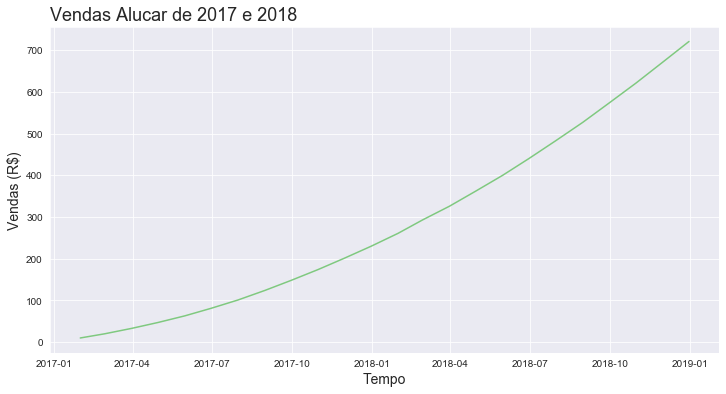

In [121]:
plotar('Vendas Alucar de 2017 e 2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', alucar)

In [122]:
alucar['aumento'] = alucar['vendas'].diff()
alucar['aceleracao'] = alucar['aumento'].diff()

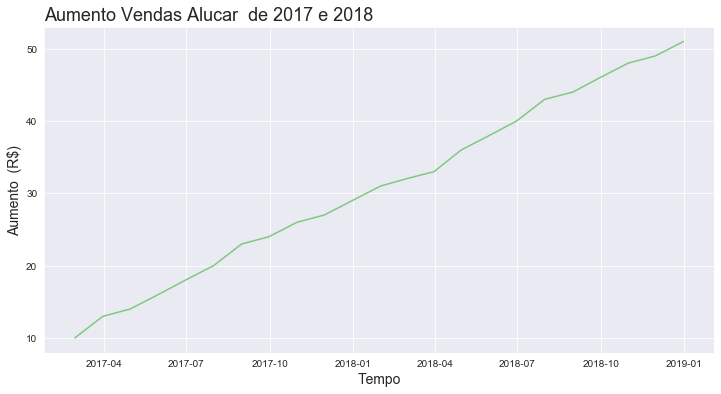

In [123]:
plotar('Aumento Vendas Alucar  de 2017 e 2018', 'Tempo', 'Aumento  (R$)', 'mes', 'aumento', alucar)

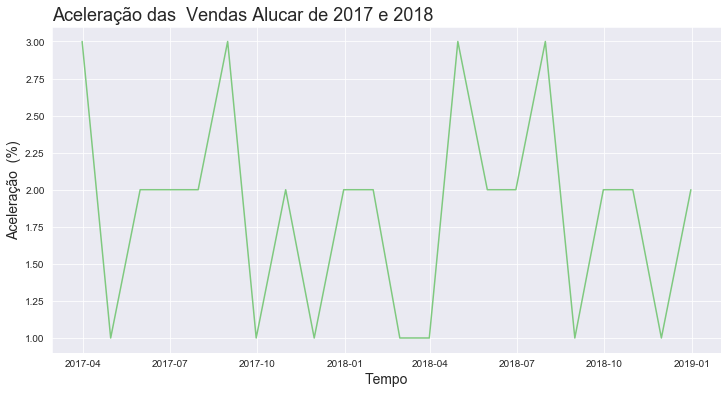

In [124]:
plotar('Aceleração das  Vendas Alucar de 2017 e 2018', 'Tempo', 'Aceleração  (%)', 'mes', 'aceleracao', alucar)

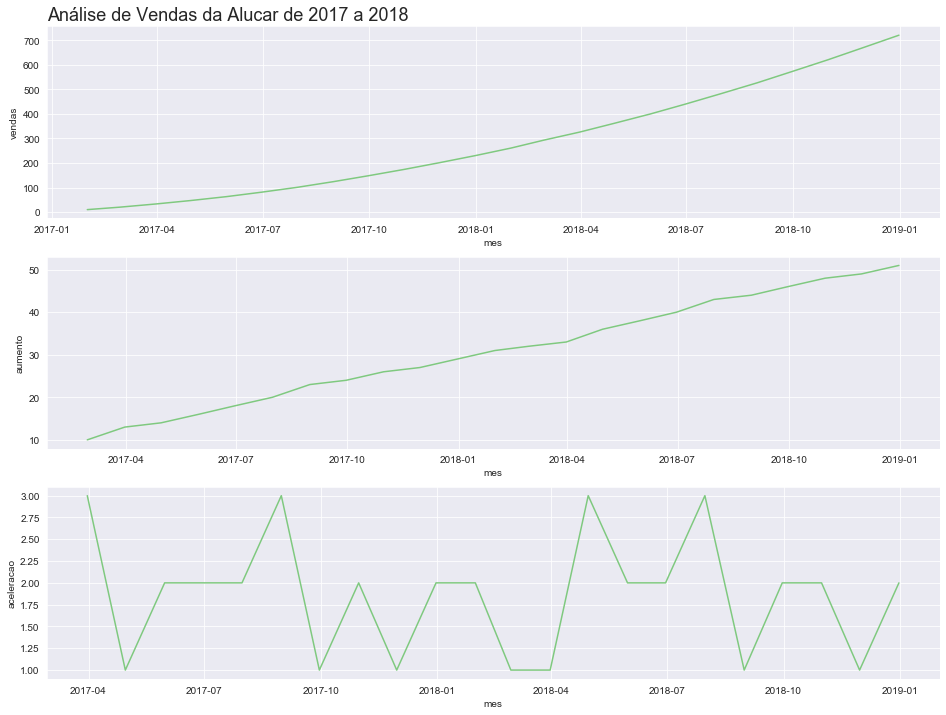

In [92]:
plot_comparacao("Análise de Vendas da Alucar de 2017 a 2018", 'mes', 'vendas', 'aumento', 'aceleracao' , dataset = alucar)


## Autocorrelação

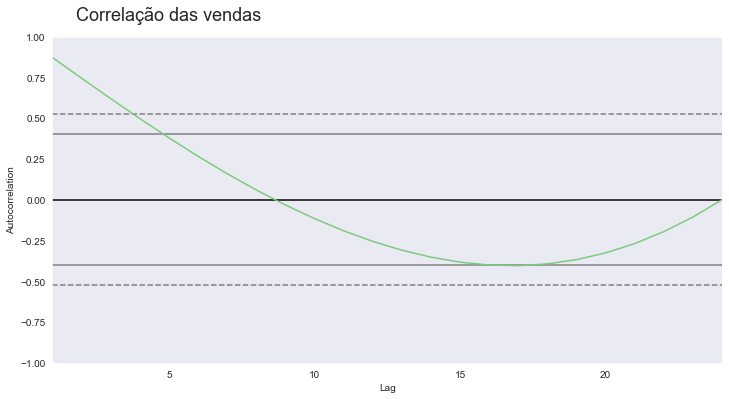

In [93]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18,x =0.26, y = 0.95)
x = autocorrelation_plot(alucar['vendas'])

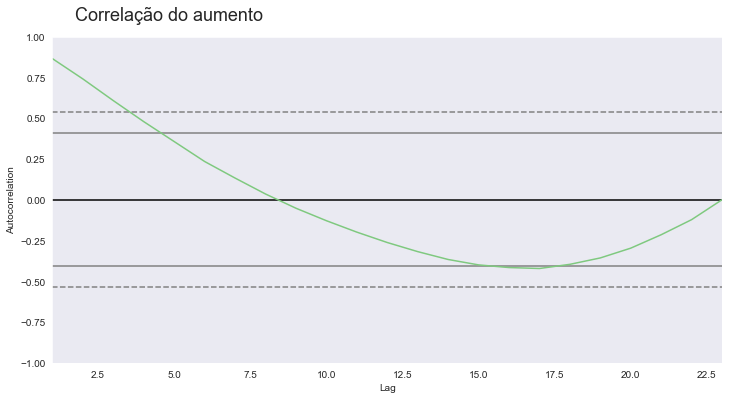

In [94]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18,x =0.26, y = 0.95)
x = autocorrelation_plot(alucar['aumento'][1:])

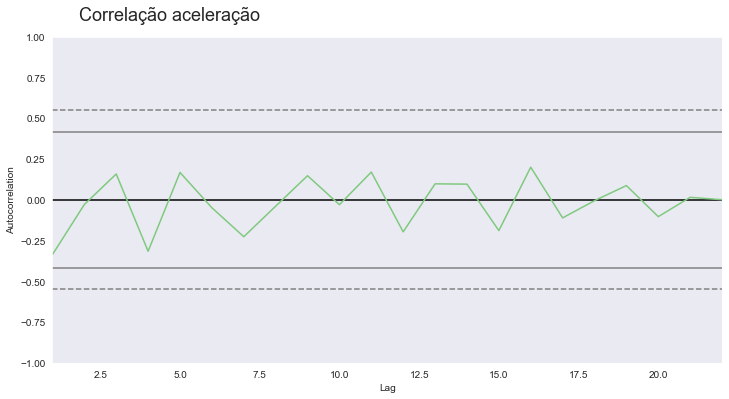

In [95]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação aceleração', fontsize=18,x =0.26, y = 0.95)
x = autocorrelation_plot(alucar['aceleracao'][2:])

## Analisando assinantes da newsletter

In [108]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

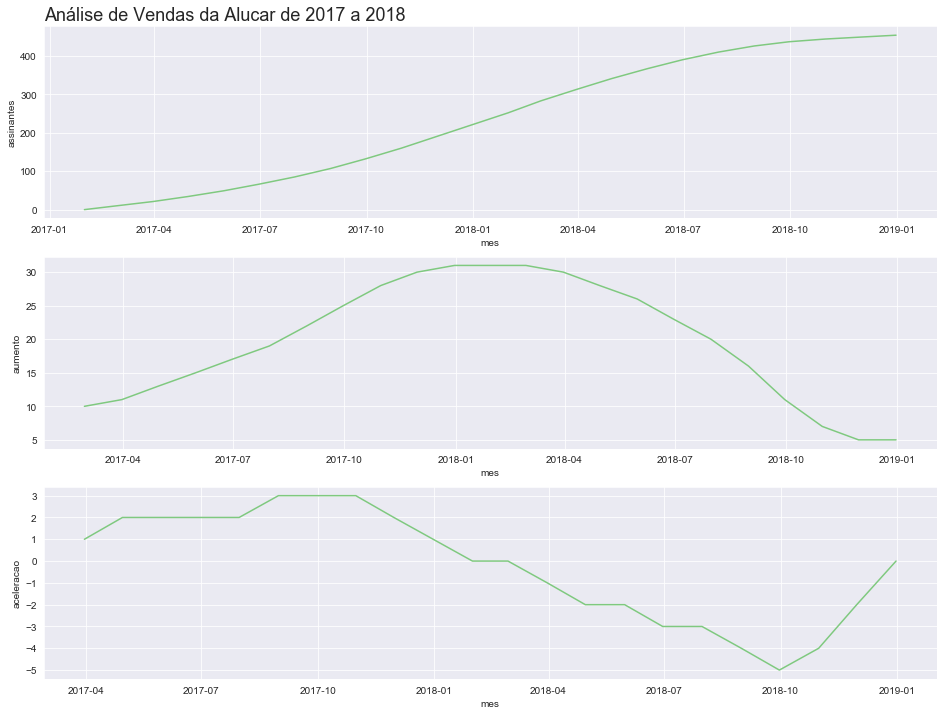

In [111]:
plot_comparacao('Comparação Assinantes', 'mes', 'assinantes', 'aumento', 'aceleracao', dataset = assinantes)